In [ ]:
# using Pkg
# Pkg.activate("..")
# Pkg.instantiate()

using Colors
using JLD2
using LinearAlgebra
using Distributions
using StatsPlots
using Plots; default(label="", grid=false, markersize=3, margin=15Plots.pt)

## Planned paths

In [4]:
Δt = 0.2
len_time = 100
tsteps = range(0, step=Δt, length=len_time)

0.0:0.2:19.8

In [ ]:
trialnum = 10
trialnumpad = lpad(trialnum, 3, '0')
results_EFE = load("results/MARXEFE-botnav-trialnum$trialnumpad.jld2")

T       = results_EFE["len_horizon"] 
N       = results_EFE["len_trial"]
goal    = results_EFE["goal"]
z_0     = results_EFE["z_0"]
z_sim   = results_EFE["z_sim"]
plans_m = results_EFE["plans_m"]
plans_S = results_EFE["plans_S"];

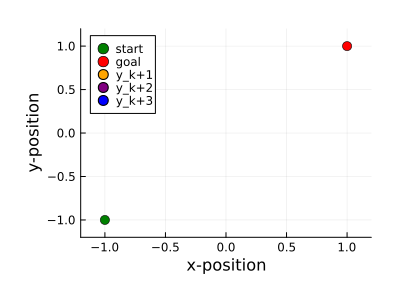

In [42]:
tpoint = 80
clrs = ["orange", "purple", "blue"]
scatter([z_0[1]], [z_0[2]], label="start", color="green", markersize=5)
scatter!([mean(goal)[1]], [mean(goal)[2]], label="goal", color="red", markersize=5)
# plot!(z_sim[1,1:tpoint], z_sim[2,1:tpoint], linewidth=3, label="system path", color="blue")
for tt in 1:T
    scatter!([plans_m[1,tt,tpoint]], [plans_m[2,tt,tpoint]], label="y_k+$tt", color=clrs[tt])
    covellipse!(plans_m[:,tt,tpoint], plans_S[:,:,tt,tpoint], n_std=1, alpha=0.1, fillalpha=0.5^tt, color=clrs[tt])
end
plot!(xlims=(-1.2, 1.2), ylims=(-1.2, 1.2), grid=true, size=(400,300), xlabel="x-position", ylabel="y-position")

In [43]:
savefig("figures/MARXEFE-botnav-plans-tpoint$tpoint.png")

"/home/synd/Wouter/Onderzoek/Projecten/tue/efe-acquisition/marxefe-mp/experiments/figures/MARXEFE-botnav-plans-tpoint80.png"

## Trajectory comparisons

In [5]:
trialnum = 1
trialnumpad = lpad(trialnum, 3, '0')
results_EFE = load("results/MARXEFE-botnav-trialnum$trialnumpad.jld2")
len_trial = results_EFE["len_trial"]
goal      = results_EFE["goal"]
z_EFE     = results_EFE["z_sim"]
z_0       = results_EFE["z_0"]

twindow = 2:len_trial
scatter([z_0[1]], [z_0[2]], label="start", color="green", markersize=5)
scatter!([mean(goal)[1]], [mean(goal)[2]], label="goal", color="red", markersize=5)
plot!(z_sim[1,twindow], z_sim[2,twindow], linewidth=3, label="EFE", color="blue")
plot!(xlims=(-1.2, 1.2), ylims=(-1.2, 1.2), grid=true, size=(400,300), xlabel="x-position", ylabel="y-position")

KeyError: KeyError: key "len_trial" not found

In [ ]:
savefig("figures/MARXEFE-botnav-trajectories.png")

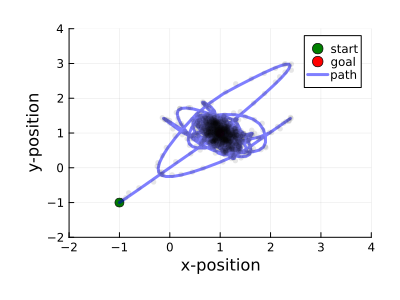

In [21]:
trialnum = 1
trialnumpad = lpad(trialnum, 3, '0')
results_MPC = load("results/MARXMPC-botnav-trialnum$trialnumpad.jld2")
len_trial = results_MPC["len_trial"]
goal      = results_MPC["goal"]
z_MPC     = results_MPC["z_sim"]
y_MPC     = results_MPC["y_sim"]
z_0       = results_MPC["z_0"]

twindow = 2:len_trial
scatter([z_0[1]], [z_0[2]], label="start", color="green", markersize=5)
scatter!([mean(goal)[1]], [mean(goal)[2]], label="goal", color="red", markersize=5)
plot!(z_MPC[1,twindow], z_MPC[2,twindow], linewidth=3, alpha=0.5, label="path", color="blue")
scatter!(y_MPC[1,twindow], y_MPC[2,twindow], color="black", alpha=0.1)
plot!(xlims=(-2., 4.), ylims=(-2., 4.), grid=true, size=(400,300), xlabel="x-position", ylabel="y-position")

In [23]:
savefig("figures/MARXMPC-botnav-trajectories.png")

"c:\\Syndr\\Wouter\\Onderzoek\\Projecten\\tue\\efe-acquisition\\marxefe-mp\\experiments\\figures\\MARXMPC-botnav-trajectories.png"

## Goal alignment

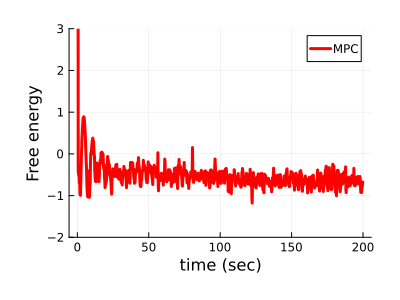

In [37]:
trialnum = 1
trialnumpad = lpad(trialnum, 3, '0')
results_EFE = load("results/MARXEFE-botnav-trialnum$trialnumpad.jld2")
results_MPC = load("results/MARXMPC-botnav-trialnum$trialnumpad.jld2")
len_trial = results_MPC["len_trial"]
goal      = results_MPC["goal"]
# F_EFE     = results_EFE["F_sim"]
# G_EFE     = results_EFE["G_sim"]
F_MPC     = results_MPC["F_sim"]
G_MPC     = results_MPC["G_sim"]
Δt        = results_MPC["Δt"]
tsteps = range(0, step=Δt, length=len_trial)

twindow = 2:len_trial
plot(grid=true, size=(400,300), ylims=(-2,3), xlabel="time (sec)", ylabel="Free energy")
# plot!(tsteps, F_EFE[twindow], linewidth=3, label="EFE", color="blue")
plot!(tsteps[twindow], F_MPC[twindow], linewidth=3, label="MPC", color="red")

In [39]:
savefig("figures/botnav-FE.png")

"c:\\Syndr\\Wouter\\Onderzoek\\Projecten\\tue\\efe-acquisition\\marxefe-mp\\experiments\\figures\\botnav-FE.png"